# Redes Adaline

* Rede feed-forward
* Treinamento Supervisionado
* Minimizar o erro quadrático de todo o conjunto de amostras
* Vetor gradiente -> aponta para o crescimento da função
* Regra delta: o ajuste nos pesos deve se dar no sentido contrário do gradiente

## Modelo de neurônio

<img src="neuronio.jpg" style=width:500px;height:400px/>

## Função de Ativação

<img src="limiar.jpg" style=width:500px;height:400px/>

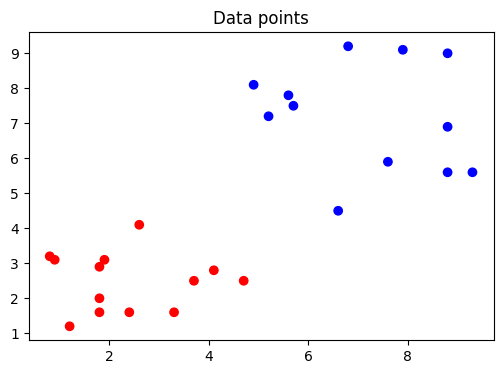

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([[5.7, 7.5], [9.3, 5.6], [8.8, 6.9], [6.8, 9.2], [7.9, 9.1],
              [8.8, 5.6], [5.6, 7.8], [8.8, 9.0], [7.6, 5.9], [4.9, 8.1],
              [6.6, 4.5], [5.2, 7.2], [1.2, 1.2], [2.4, 1.6], [4.7, 2.5],
              [0.9, 3.1], [2.6, 4.1], [1.8, 2.0], [4.1, 2.8], [1.8, 1.6],
              [1.9, 3.1], [0.8, 3.2], [1.8, 2.9], [3.3, 1.6], [3.7, 2.5]
             ])

d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [3]:
#CRIANDO A CLASSE DA REDE ADALINE
class Adaline:
    
    def __init__(self, lr, e):
        '''Construtor, define taxa de aprendizado e a taxa de erro aceita para convergir'''
        self.lr = lr
        self.e = e
        
    def activation(self, value):
        ''' 1 se value > 0, -1 senão'''
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

In [4]:
#Instanciando e treinando a rede
rede = Adaline(lr = 0.01, e = 1e-5)
rede.train(x = x, d = d)

EPOCH: 0	- MSE: 2.655774156843492	- MSE_ant - MSE: inf
EPOCH: 1	- MSE: 1.0047894973242162	- MSE_ant - MSE: 1.6509846595192759
EPOCH: 2	- MSE: 0.9458145528511716	- MSE_ant - MSE: 0.05897494447304463
EPOCH: 3	- MSE: 0.8944680875438165	- MSE_ant - MSE: 0.051346465307355094
EPOCH: 4	- MSE: 0.8477049702983487	- MSE_ant - MSE: 0.04676311724546778
EPOCH: 5	- MSE: 0.80436178292722	- MSE_ant - MSE: 0.04334318737112863
EPOCH: 6	- MSE: 0.7639203246331671	- MSE_ant - MSE: 0.04044145829405299
EPOCH: 7	- MSE: 0.7260904663173834	- MSE_ant - MSE: 0.03782985831578367
EPOCH: 8	- MSE: 0.6906683938885133	- MSE_ant - MSE: 0.03542207242887008
EPOCH: 9	- MSE: 0.6574876250648255	- MSE_ant - MSE: 0.03318076882368781
EPOCH: 10	- MSE: 0.6264014626376119	- MSE_ant - MSE: 0.031086162427213626
EPOCH: 11	- MSE: 0.5972762409439699	- MSE_ant - MSE: 0.029125221693641956
EPOCH: 12	- MSE: 0.569988380562131	- MSE_ant - MSE: 0.027287860381838946
EPOCH: 13	- MSE: 0.5444228584606259	- MSE_ant - MSE: 0.02556552210150509
EPOCH

In [5]:
# Entrando com novos valores para teste
x_teste = np.array([[6, 2], [9, 3], [5, 6], [7, 3], [6, 7], [1, 6]])

teste_resultado = rede.test(x_teste)
teste_resultado

[1, -1, 1, 1, -1, 1]

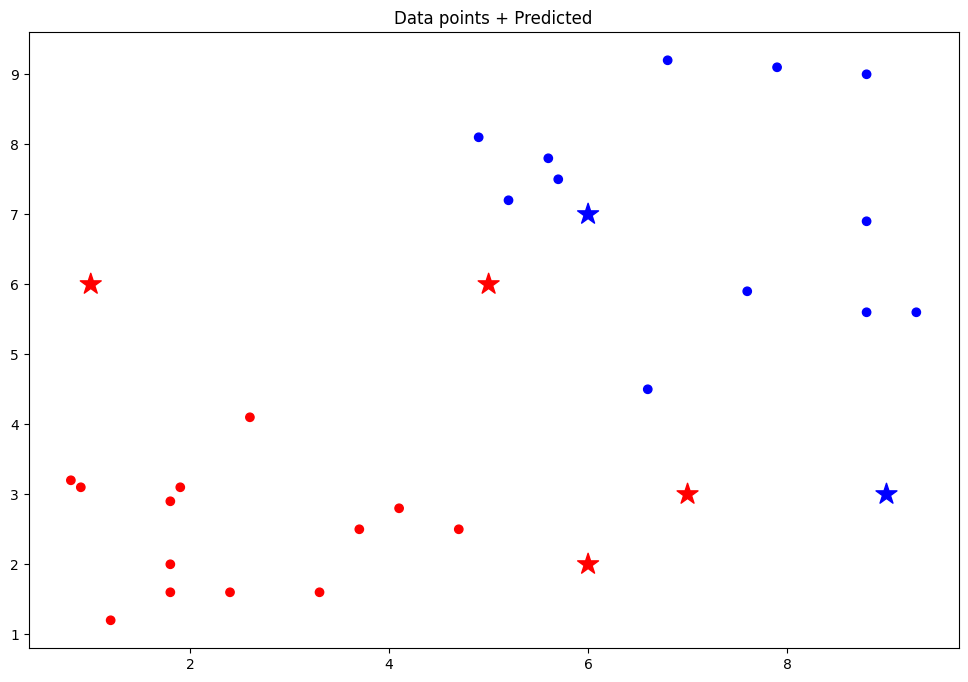

In [6]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

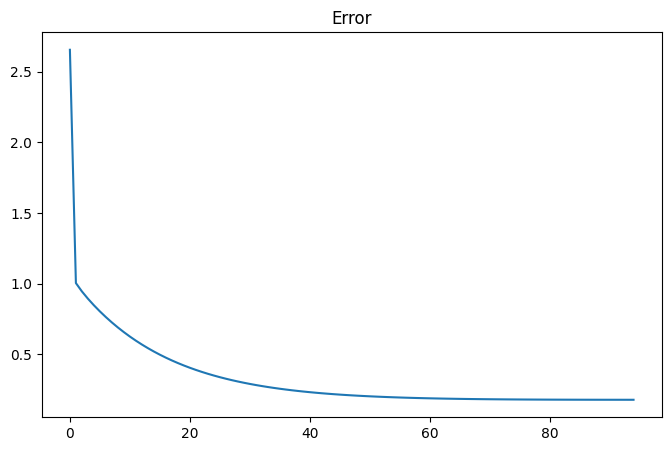

In [7]:
plt.figure(figsize=(8,5))
plt.title("Error")
plt.plot(rede.total_mse)
plt.show()